# B0822012邱元肇_CH3筆記

**作業要求:**

依據第三週老師課後所講的作業繳交內容，僅需上傳回去自己試跑的程式與筆記就可以了

**原始程式碼來源:**

https://github.com/fchollet/deep-learning-with-python-notebooks

Chapter 3: Introduction to Keras and TensorFlow


**本章摘要**
* 介紹tensor的特性、指派、運算方法
* tensor與numpy最大不同：**能算梯度**
* 生成二維數據，自訂正向、反向傳播函數，訓練40次，更新權重w,b畫出數據決策邊界
  * 方法：使用利用`np.random.multivariate_normal`產生數據
  *定義正向傳播函數`def model(inputs)`
  *定義損失函數`def square_loss(targets, predictions)`
  *定義訓練函數(需給定學習率)`def training_step(inputs, targets)`
  *以for迴圈執行訓練
* 介紹模型設計(Dense層)、模型編譯(Compile)、模型訓練(model.fit())、取出預測結果(model.predict())

This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Introduction to Keras and TensorFlow

## What's TensorFlow?

## What's Keras?

## Keras and TensorFlow: A brief history

## Setting up a deep-learning workspace

### Jupyter notebooks: The preferred way to run deep-learning experiments

### Using Colaboratory

#### First steps with Colaboratory

#### Installing packages with pip

#### Using the GPU runtime

## First steps with TensorFlow

#### Constant tensors and variables

**All-ones or all-zeros tensors**

In [ ]:
import tensorflow as tf
x = tf.ones(shape=(2, 1))
print(x)
print('===='*10)

var_x = tf.Variable(x)
print(var_x)
print('===='*10)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[1.],
       [1.]], dtype=float32)>


In [ ]:
print(x[0])
print('===='*10)

print(var_x)
print('===='*10)

print(var_x[0])
print('===='*10)

print(var_x[0,0])
print('===='*10)

tf.Tensor([1.], shape=(1,), dtype=float32)
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[1.],
       [1.]], dtype=float32)>
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor(1.0, shape=(), dtype=float32)


In [ ]:
# var_x[0,0]= 1000 #會爆氣
var_x[0,0].assign(1000)
print(var_x)
print('===='*10)

var_x[0].assign([2000])
print(var_x)
print('===='*10)

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[1000.],
       [   1.]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[2.e+03],
       [1.e+00]], dtype=float32)>


In [ ]:
x_shp = tf.zeros(shape=(2, 1))
print(x_shp)

tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


**Random tensors**

In [4]:
# normal distribution 常態分布

x = tf.random.normal(shape=(3, 1), mean=0., stddev=1.)
print(x)
print('===='*10)

x = tf.random.normal(shape=(3,2,2)) # mean=0., stddev=1.
print(x)
print('===='*10)

x = tf.random.normal(shape=(1,)) # mean=0., stddev=1.
print(x)
print('===='*10)

# 不能這樣
# x = tf.random.normal() # mean=0., stddev=1.
# print(x)
# print('===='*10)

tf.Tensor(
[[-0.07445468]
 [ 0.2228161 ]
 [-0.7223058 ]], shape=(3, 1), dtype=float32)
tf.Tensor(
[[[-0.8252818  -0.54269737]
  [ 0.10484487  0.75185853]]

 [[-0.42891866  0.94716406]
  [-0.6172725   0.21603373]]

 [[-0.40743005  0.63845164]
  [-0.32675394 -0.7292842 ]]], shape=(3, 2, 2), dtype=float32)
tf.Tensor([-0.93376255], shape=(1,), dtype=float32)


In [5]:
# uniform distribution 均勻分布

x = tf.random.uniform(shape=(3, 1), minval=0., maxval=1.)
print(x)

tf.Tensor(
[[0.4957403 ]
 [0.338858  ]
 [0.88745666]], shape=(3, 1), dtype=float32)


**NumPy arrays are assignable**

In [7]:
import numpy as np
x = np.ones(shape=(2, 2))
x[0, 0] = 0.
x

array([[0., 1.],
       [1., 1.]])

**指派值給TensorFlow，馬上跳錯誤給你看:)**

錯誤訊息： `EagerTensor object does not support item
assignment.`

原因：Tensor無法直接指派值

In [8]:
x = tf.ones(shape=(2, 2))
x[0, 0] = 0.

TypeError: ignored

**Creating a TensorFlow variable**

首先創建一個Variable Tensor，並給定初值

In [9]:
# const 轉 variable tensor
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[1.3605561],
       [1.2371366],
       [0.2222842]], dtype=float32)>


**Assigning a value to a TensorFlow variable**

In [14]:
v.assign(tf.ones((3, 1)))

# 同樣，指派時要用 assign，不能直接用 =
# v[0,0] = 2

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

**Assigning a value to a subset of a TensorFlow variable**

In [22]:
v[0, 0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [2.],
       [2.]], dtype=float32)>

**Using `assign_add`**

格式：`v.assign_add(Tensor)`

*註：v與Tensor的shape必須完全一致

In [23]:
# 疊加 ( v + Tensor )
v.assign_add(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [3.],
       [3.]], dtype=float32)>

In [24]:
# 相減 ( v - Tensor )
v.assign_sub(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [2.],
       [2.]], dtype=float32)>

#### Tensor operations: Doing math in TensorFlow

**A few basic math operations**

* 平方：`tf.square(a)`

* 開根號：`tf.sqrt(a)`

* 矩陣相乘(同a@b)：`tf.matmul(a, b)`

* e = e * d：`e *= d`

In [25]:
# 書商
a = tf.ones((2, 2))
b = tf.square(a)
c = tf.sqrt(a)
d = b + c
e = tf.matmul(a, b)
e *= d

# 老師
a = tf.ones((2, 2)) * 100
b = tf.square(a) # 也可以直接 b = a**2
c = tf.sqrt(a) # 也可以直接 b = a**0.5
d = b + c
e = tf.matmul(a, b) # 矩陣運算。也可以 a @ b
e *= d

In [ ]:
a

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[100., 100.],
       [100., 100.]], dtype=float32)>

In [ ]:
b

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[10000., 10000.],
       [10000., 10000.]], dtype=float32)>

In [ ]:
c

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[10., 10.],
       [10., 10.]], dtype=float32)>

In [ ]:
d

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[10010., 10010.],
       [10010., 10010.]], dtype=float32)>

In [43]:
print( tf.matmul(a, b) )
print('===='*10)

print( a @ b )
print('===='*10)

import numpy as np
aa = np.ones((2,2))
bb = np.ones((2,2))*10
print(aa)
print(bb)
print(aa * bb)
print(aa @ bb)
print('===='*10)

x1 = tf.Variable(initial_value=np.array([[1,5,6],[2,3,8]]),dtype='float32')
x2 = tf.ones(shape=(2,3))*2
x12乘 = x1*x2
print('x1=',x1)
print('x2=',x2)
print('x1 * x2 =',x12乘)

tf.Tensor(
[[2000000. 2000000.]
 [2000000. 2000000.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[2000000. 2000000.]
 [2000000. 2000000.]], shape=(2, 2), dtype=float32)
[[1. 1.]
 [1. 1.]]
[[10. 10.]
 [10. 10.]]
[[10. 10.]
 [10. 10.]]
[[20. 20.]
 [20. 20.]]
x1= <tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[1., 5., 6.],
       [2., 3., 8.]], dtype=float32)>
x2= tf.Tensor(
[[2. 2. 2.]
 [2. 2. 2.]], shape=(2, 3), dtype=float32)
x1 * x2 = tf.Tensor(
[[ 2. 10. 12.]
 [ 4.  6. 16.]], shape=(2, 3), dtype=float32)


In [47]:
print(a)
print(b)
print('===='*10)
print(e)

# e = e * d 
#   = tf.matmul(a, b) * (b+c)
#   = tf.matmul(a, b) * (tf.square(a)+tf.sqrt(a))

tf.Tensor(
[[100. 100.]
 [100. 100.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[10000. 10000.]
 [10000. 10000.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[2.002e+10 2.002e+10]
 [2.002e+10 2.002e+10]], shape=(2, 2), dtype=float32)


#### A second look at the GradientTape API

**Using the `GradientTape`**

In [48]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
   result = tf.square(input_var)
gradient = tape.gradient(result, input_var)

In [49]:
input_var, gradient

(<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=3.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=6.0>)

In [50]:
# 範例1 梯度計算的函式呼叫方法
# x = 3
# y = x^2 = 9
# dy/dx = 2x = 6

x = tf.Variable(3.)
with tf.GradientTape() as t:
  y = x**2
dy_dx = t.gradient(y, x)

x, y, dy_dx

(<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=3.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=9.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=6.0>)

In [51]:
# 範例2 導入函數，提高程式靈活性

def f(x):
  y = x**3 + x**2 + x +1
  return y

x = tf.Variable(10.)
with tf.GradientTape() as t:
  y = f(x)
dy_dx = t.gradient(y, x)

x, y, dy_dx

(<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=10.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1111.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=321.0>)

In [52]:
# 範例3 即使函數極其複雜也能算出梯度

def f(x):
  y = tf.sin(x**3) + tf.exp(x**2) + x +1
  return y

x = tf.Variable(10.)
with tf.GradientTape() as t:
  y = f(x)
dy_dx = t.gradient(y, x)

x, y, dy_dx

(<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=10.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=inf>,
 <tf.Tensor: shape=(), dtype=float32, numpy=inf>)

In [53]:
# 範例4 複合函數，也能計算梯度

def f(x):
  y = tf.sin(x) + tf.exp(-x) + 1
  return y
def g(x):
  y = tf.cos(x) + tf.exp(-2*x)
  return y

x = tf.Variable(1.)
with tf.GradientTape() as t:
  y = g(f(x))

dy_dx = t.gradient(y, x)

x, y, dy_dx

(<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=-0.58398515>,
 <tf.Tensor: shape=(), dtype=float32, numpy=-0.1426037>)

**W3上課進度至以上為止**

回家作業：除了以上code回家試run，也試run以下code

**Using `GradientTape` with constant tensor inputs**

In [62]:
#沒加入 .watch() => 跑不出梯度結果
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
   result = tf.square(input_const)
gradient = tape.gradient(result, input_const)
input_const,result,gradient

(<tf.Tensor: shape=(), dtype=float32, numpy=3.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=9.0>,
 None)

In [63]:
#有加入 .watch() => 才可有梯度結果
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
   tape.watch(input_const)
   result = tf.square(input_const)
gradient = tape.gradient(result, input_const)
input_const,result,gradient

(<tf.Tensor: shape=(), dtype=float32, numpy=3.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=9.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=6.0>)

**Using nested gradient tapes to compute second-order gradients**

In [66]:
# 給定x=4.9t^2 ，計算a=x''=?
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position =  4.9 * time ** 2   # x=4.9t^2
    speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)
time, position, speed, acceleration

(<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=9.8>)

#### An end-to-end example: A linear classifier in pure TensorFlow

**Generating two classes of random points in a 2D plane**

**使用np.random.multivariate_normal**

x,y的二維常態分布：

<img src="https://picx.zhimg.com/80/v2-8db5e6317b8164e1b56403a12fd65480_720w.webp?source=1940ef5c">

**舉例:** 設置mean=[3，0]，cov=diag(1，1)，使用300個點繪製散布圖，列印出X和Y的方差均接近於設定的值1。也可以看到散布圖中，X和Y的均值大致上分别是3和0。

<img src="https://picx.zhimg.com/80/v2-db78d0356dddee2d57e0b5be7dd6ce24_720w.webp?source=1940ef5c">

<img src="https://picx.zhimg.com/v2-bf9cbfe0500264cead55d021c4840c11_r.jpg?source=1940ef5c">


In [73]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)
print(negative_samples,np.shape(negative_samples))
print(positive_samples,np.shape(positive_samples))

[[ 0.93469757  3.0685841 ]
 [-1.57415098  2.17715664]
 [-2.04197999  1.6682978 ]
 ...
 [ 0.12395299  2.88434129]
 [ 0.71284273  3.37020426]
 [-1.60840808  0.41208567]] (1000, 2)
[[ 5.60520282  0.66304698]
 [ 3.13020496  0.08941552]
 [ 2.17681203  0.69512296]
 ...
 [ 1.89314416  0.73901858]
 [ 2.26776419  0.31561356]
 [ 2.69657199 -0.08850704]] (1000, 2)


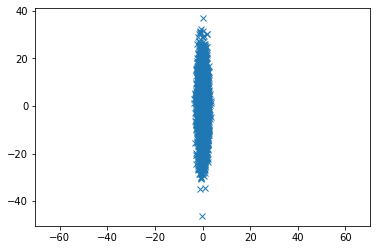

In [76]:
mean = [0, 0]
cov = [[1, 0], [0, 100]]
import matplotlib.pyplot as plt
x, y = np.random.multivariate_normal(mean, cov, 5000).T
plt.plot(x, y, 'x')
plt.axis('equal')
plt.show()

In [81]:
print(np.eye(1)) # 用於1D常態分布
print(np.eye(2)) # 用於2D常態分布

[[1.]]
[[1. 0.]
 [0. 1.]]


**Stacking the two classes into an array with shape (2000, 2)**

將negative_samples與positive_samples合併

In [82]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)
inputs

array([[ 0.93469757,  3.0685842 ],
       [-1.574151  ,  2.1771567 ],
       [-2.04198   ,  1.6682978 ],
       ...,
       [ 1.8931441 ,  0.73901856],
       [ 2.267764  ,  0.31561357],
       [ 2.696572  , -0.08850704]], dtype=float32)

**Generating the corresponding targets (0 and 1)**

新增標籤矩陣targets：

前1000列標籤0 (用`np.zeros`)

後1000列標籤1 (用`np.ones`)

In [84]:
# 剛剛有定義num_samples_per_class = 1000
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))
targets

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

**Plotting the two point classes**

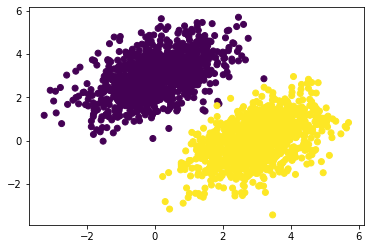

In [93]:
# 畫出剛才合併後inputs的散布圖(2000,2)，以標籤矩陣targets區分顏色
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

**Creating the linear classifier variables**

目標：找到能夠區分紫色、黃色數據的直線

In [101]:
# prediction = w * input + b

input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))
print(W,'\n\n',b)

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[0.6922313 ],
       [0.96307623]], dtype=float32)> 

 <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>


**The forward pass function**

定義正向傳播函數

In [102]:
def model(inputs):
    return tf.matmul(inputs, W) + b

**The mean squared error loss function**

定義損失函數(採用均方差)

In [119]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses) #回傳損失矩陣的平均值(是一個數)

**The training step function**

給定學習率0.1，定義一個訓練周期的函數


In [124]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape: # tape 即 t
        predictions = model(inputs) #正向傳播； y = x...
        loss = square_loss(targets, predictions) #計算損失； y = x...
    
    #dy/dx = t.gradient(y, x)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b]) 

    #反向傳播
    W.assign_sub(grad_loss_wrt_W * learning_rate) # W = W - (lossW * rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate) # b = b - (lossb * rate)
    return loss

**梯度計算的用法(複習)**

In [121]:
x = tf.Variable(3.)
with tf.GradientTape() as t:
  y = x**2
dy_dx = t.gradient(y, x)

x, y, dy_dx

(<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=3.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=9.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=6.0>)

**The batch training loop**

以for迴圈重複訓練，訓練40次

In [105]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 6.7162
Loss at step 1: 0.8680
Loss at step 2: 0.2458
Loss at step 3: 0.1591
Loss at step 4: 0.1395
Loss at step 5: 0.1290
Loss at step 6: 0.1203
Loss at step 7: 0.1124
Loss at step 8: 0.1052
Loss at step 9: 0.0986
Loss at step 10: 0.0925
Loss at step 11: 0.0869
Loss at step 12: 0.0818
Loss at step 13: 0.0771
Loss at step 14: 0.0728
Loss at step 15: 0.0688
Loss at step 16: 0.0652
Loss at step 17: 0.0619
Loss at step 18: 0.0588
Loss at step 19: 0.0560
Loss at step 20: 0.0534
Loss at step 21: 0.0511
Loss at step 22: 0.0489
Loss at step 23: 0.0469
Loss at step 24: 0.0451
Loss at step 25: 0.0434
Loss at step 26: 0.0419
Loss at step 27: 0.0405
Loss at step 28: 0.0392
Loss at step 29: 0.0380
Loss at step 30: 0.0369
Loss at step 31: 0.0359
Loss at step 32: 0.0350
Loss at step 33: 0.0342
Loss at step 34: 0.0334
Loss at step 35: 0.0327
Loss at step 36: 0.0320
Loss at step 37: 0.0314
Loss at step 38: 0.0309
Loss at step 39: 0.0304


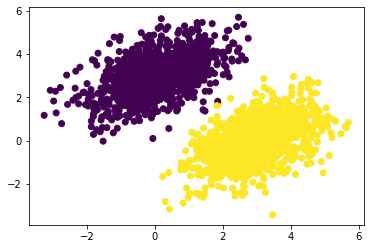

In [106]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

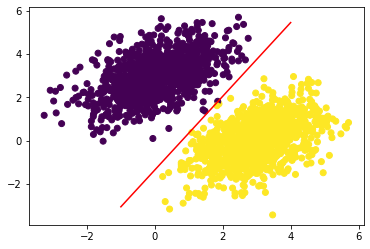

In [107]:
# 畫出區隔直線 prediction = [[w1],[w2]] * [x,y] + b
#              = w1*x + w2*y + b
x = np.linspace(-1, 4, 100)
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)

## Anatomy of a neural network: Understanding core Keras APIs

### Layers: The building blocks of deep learning

#### The base Layer class in Keras

**A `Dense` layer implemented as a `Layer` subclass**

設計神經網路的Dense層

In [108]:
from tensorflow import keras

class SimpleDense(keras.layers.Layer):

    def __init__(self, units, activation=None):
        super().__init__()
        self.units = units
        self.activation = activation

    def build(self, input_shape): # 給定W,b的初始權重
        input_dim = input_shape[-1]
        self.W = self.add_weight(shape=(input_dim, self.units),
                                 initializer="random_normal")
        self.b = self.add_weight(shape=(self.units,),
                                 initializer="zeros")

    def call(self, inputs): # 正向傳播
        y = tf.matmul(inputs, self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return y

In [109]:
my_dense = SimpleDense(units=32, activation=tf.nn.relu)
input_tensor = tf.ones(shape=(2, 784))
output_tensor = my_dense(input_tensor)
print(output_tensor.shape)

(2, 32)


#### Automatic shape inference: Building layers on the fly

引用keras現成的Dense層

In [125]:
from tensorflow.keras import layers
layer = layers.Dense(32, activation="relu") #建立輸入層(32)，啟動函數relu

In [126]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32) #建立大小為32的隱藏層(假定尚未添加輸出層)
])

In [127]:
model = keras.Sequential([
    SimpleDense(32, activation="relu"),
    SimpleDense(64, activation="relu"),
    SimpleDense(32, activation="relu"),
    SimpleDense(10, activation="softmax") #建立大小為10的輸出層，啟動函數softmax
])

### From layers to models

### The "compile" step: Configuring the learning process

模型建置完成，編譯模型成高階語言，使後續的程式能夠拿來進行訓練

In [128]:
model = keras.Sequential([keras.layers.Dense(1)])
# 編譯模型，決定優化器、損失函數與準確率評估方法
model.compile(optimizer="rmsprop",
              loss="mean_squared_error",
              metrics=["accuracy"])

In [129]:
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

### Picking a loss function

### Understanding the fit() method

**Calling `fit()` with NumPy data**

完成編譯後的模型，可用`fit()`訓練

In [130]:
history = model.fit(
    inputs,
    targets,
    epochs=5, #訓練週期5
    batch_size=128 #批次尺寸128
)

Epoch 1/5
16/16 [==============================] - 1s 3ms/step - loss: 7.3386 - binary_accuracy: 0.9975
Epoch 2/5
16/16 [==============================] - 0s 3ms/step - loss: 7.0253 - binary_accuracy: 0.9975
Epoch 3/5
16/16 [==============================] - 0s 3ms/step - loss: 6.7616 - binary_accuracy: 0.9975
Epoch 4/5
16/16 [==============================] - 0s 3ms/step - loss: 6.5074 - binary_accuracy: 0.9975
Epoch 5/5
16/16 [==============================] - 0s 3ms/step - loss: 6.2594 - binary_accuracy: 0.9975


In [131]:
# 查看訓練過程中所儲存的參數
history.history

{'loss': [7.338642597198486,
  7.025326251983643,
  6.761574745178223,
  6.507368564605713,
  6.259353160858154],
 'binary_accuracy': [0.9975000023841858,
  0.9975000023841858,
  0.9975000023841858,
  0.9975000023841858,
  0.9975000023841858]}

### Monitoring loss and metrics on validation data

**Using the `validation_data` argument**

In [117]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

indices_permutation = np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]

num_validation_samples = int(0.3 * len(inputs))
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]
model.fit(
    training_inputs,
    training_targets,
    epochs=5,
    batch_size=16,
    validation_data=(val_inputs, val_targets) #顯示驗證資料集在訓練過程的驗證損失與準確率
)

Epoch 1/5
88/88 [==============================] - 1s 4ms/step - loss: 0.3836 - binary_accuracy: 0.8543 - val_loss: 0.0403 - val_binary_accuracy: 0.9900
Epoch 2/5
88/88 [==============================] - 0s 3ms/step - loss: 0.0744 - binary_accuracy: 0.9464 - val_loss: 0.0389 - val_binary_accuracy: 0.9950
Epoch 3/5
88/88 [==============================] - 0s 2ms/step - loss: 0.0713 - binary_accuracy: 0.9586 - val_loss: 0.2176 - val_binary_accuracy: 0.8850
Epoch 4/5
88/88 [==============================] - 0s 2ms/step - loss: 0.0680 - binary_accuracy: 0.9643 - val_loss: 0.1187 - val_binary_accuracy: 0.8767
Epoch 5/5
88/88 [==============================] - 0s 2ms/step - loss: 0.0745 - binary_accuracy: 0.9593 - val_loss: 0.1831 - val_binary_accuracy: 0.6517


### Inference: Using a model after training

**顯示前10筆資料預測結果**

In [118]:
predictions = model.predict(val_inputs, batch_size=128)
print(predictions[:10])

[[1.0428206 ]
 [0.74102885]
 [0.61514485]
 [0.83595574]
 [0.55318034]
 [0.9401332 ]
 [0.8434371 ]
 [1.1208842 ]
 [0.94899035]
 [0.90685236]]


## Summary

請看本文章最頂處，我在文初做好了摘要